In [1]:
!pip install keras
!pip install matplotlib
!pip install sklearn
!pip install imblearn
!pip install python-resize-image
!pip install opencv-python

In [28]:
import cv2
import matplotlib.pyplot as plt

# MNIST

First, I focus just on MNIST data to find a good model that works

In [171]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train_mnist = x_train_mnist.reshape(x_train_mnist.shape[0], 1, img_rows, img_cols)
    x_test_mnist = x_test_mnist.reshape(x_test_mnist.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_mnist = x_train_mnist.reshape(x_train_mnist.shape[0], img_rows, img_cols, 1)
    x_test_mnist = x_test_mnist.reshape(x_test_mnist.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train_mnist = x_train_mnist.astype('float32')
x_test_mnist = x_test_mnist.astype('float32')
x_train_mnist /= 255
x_test_mnist /= 255
print('x_train shape:', x_train_mnist.shape)
print(x_train_mnist.shape[0], 'train samples')
print(x_test_mnist.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train_mnist = keras.utils.to_categorical(y_train_mnist, num_classes)
y_test_mnist = keras.utils.to_categorical(y_test_mnist, num_classes)

my_input = Input(shape=input_shape, name='written_input')
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(my_input)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

written_model = Model(inputs=[my_input], outputs=[output])

written_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

written_model.fit(x_train_mnist, y_train_mnist,
          batch_size=100,
          epochs=20,
          verbose=1,
          validation_data=(x_test_mnist, y_test_mnist))

score = written_model.evaluate(x_test_mnist, y_test_mnist, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2294 - acc: 0.9297 - val_loss: 0.0587 - val_acc: 0.9806
Epoch 2/20
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0815 - acc: 0.9755 - val_loss: 0.0388 - val_acc: 0.9871
Epoch 3/20
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0625 - acc: 0.9812 - val_loss: 0.0332 - val_acc: 0.9881
Epoch 4/20
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0530 - acc: 0.9847 - val_loss: 0.0304 - val_acc: 0.9895
Epoch 5/20
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0441 - acc: 0.9865 - val_loss: 0.0320 - val_acc: 0.9898
Epoch 6/20
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0416 - acc: 0.9872 - val_loss: 0.0330 - val_acc: 0.9893
Epoch 7/20
60000/60000 [==============================]

KeyboardInterrupt: 

In [6]:
written_model.save_weights('weights_written.h5')

# ARABIC DATASET

Now I focus just on a labeled set with same format as the given data. Using this data I try to find a good model 

In [685]:
import numpy as np

In [686]:
fragment_length = 25

In [687]:
file = open('Train_Arabic_Digit.txt','r')
x_train = []
block = []
for line in file:
    if '    ' in line:
        x_train.append(np.array(block))
        block = []
        continue
    block.append(np.array([-float(i) for i in line.strip('\n').split(' ')]))
x_train.append(np.array(block))

In [688]:
x_train[0].shape

(38, 13)

In [689]:
y_train = np.array([])
for i in range(10):
    y_train = np.concatenate((y_train,i*np.ones((660))),axis=0)

In [690]:
file = open('Test_Arabic_Digit.txt','r')
x_test = []
block = []
for line in file:
    if '    ' in line:
        x_test.append(np.array(block))
        block = []
        continue
    block.append(np.array([-float(i) for i in line.strip('\n').split(' ')]))
x_test.append(np.array(block))

In [691]:
y_test = np.array([])
for i in range(10):
    y_test = np.concatenate((y_test,i*np.ones((220))),axis=0)

In [792]:
def annoying_teacher_transformer(mat):
    new_mat = np.zeros(mat.shape) 
    new_mat[:,1] = -mat[:,0]
    new_mat[:,2] = -mat[:,1]
    new_mat[:,9] = -mat[:,2]
    new_mat[:,3] = -mat[:,3]
    new_mat[:,12] = -mat[:,4]
    new_mat[:,0] = -mat[:,5]
    new_mat[:,10] = -mat[:,6]
    new_mat[:,6] = -mat[:,7]
    new_mat[:,11] = -mat[:,8]  
    new_mat[:,4] = -mat[:,9]
    new_mat[:,8] = -mat[:,10]  
    new_mat[:,7] = -mat[:,11] 
    new_mat[:,5] = -mat[:,12]
    return new_mat

In [693]:
x_train = [annoying_teacher_transformer(x) for x in x_train]
x_test  = [annoying_teacher_transformer(x) for x in x_test]

In [694]:
def transform_data(x_old,new_shape):
    x_new = np.zeros((len(x_old),new_shape[0],new_shape[1],new_shape[2]))
    for idx,im in enumerate(x_old):
        im = cv2.cvtColor(im.astype('float32'), cv2.COLOR_GRAY2BGR)
        new_im = cv2.resize(im,(new_shape[1],new_shape[0]), interpolation = cv2.INTER_CUBIC)
        x_new[idx,:,:,:] = new_im[:,:,0].reshape(new_shape[0],new_shape[1],new_shape[2])
    return x_new 

In [695]:
x_train_new = transform_data(x_train,(fragment_length,13,1))
x_test_new = transform_data(x_test,(fragment_length,13,1))

In [696]:
from sklearn.utils import shuffle
X_tr, y_tr = shuffle(x_train_new, y_train)
X_te, y_te = shuffle(x_test_new, y_test)

In [697]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras.optimizers import Adagrad

batch_size = 100
epochs = 20
num_classes = 10

X_tr /= 8
X_te /= 8

y_tr = keras.utils.to_categorical(y_tr, num_classes)
y_te = keras.utils.to_categorical(y_te, num_classes)
s

print(X_tr.shape[0], 'train samples')
print(X_te.shape[0], 'test samples')


my_input = Input(shape=(fragment_length,13,1), name='spoken_input')
x = Conv2D(32, kernel_size=(3, 3), activation='tanh')(my_input)
x = Conv2D(64, (3, 3), activation='tanh')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(100, activation='relu',kernel_initializer='uniform')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

spoken_model = Model(inputs=[my_input], outputs=[output])

6600 train samples
2200 test samples


In [698]:
spoken_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

spoken_model.fit(X_tr, y_tr,
          batch_size=200,
          epochs=20,
          verbose=1,
          validation_data=(X_te, y_te))
score = spoken_model.evaluate(X_te, y_te, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 6600 samples, validate on 2200 samples
Epoch 1/20
6600/6600 [==============================] - 3s 480us/step - loss: 1.1499 - acc: 0.6436 - val_loss: 0.3277 - val_acc: 0.8982
Epoch 2/20
6600/6600 [==============================] - 2s 360us/step - loss: 0.3681 - acc: 0.8862 - val_loss: 0.2326 - val_acc: 0.9200
Epoch 3/20
6600/6600 [==============================] - 2s 351us/step - loss: 0.2498 - acc: 0.9221 - val_loss: 0.1609 - val_acc: 0.9441
Epoch 4/20
6600/6600 [==============================] - 3s 389us/step - loss: 0.1929 - acc: 0.9394 - val_loss: 0.1467 - val_acc: 0.9477
Epoch 5/20
6600/6600 [==============================] - 2s 372us/step - loss: 0.1592 - acc: 0.9489 - val_loss: 0.1338 - val_acc: 0.9486
Epoch 6/20
6600/6600 [==============================] - 2s 375us/step - loss: 0.1329 - acc: 0.9574 - val_loss: 0.1220 - val_acc: 0.9550
Epoch 7/20
6600/6600 [==============================] - 2s 356us/step - loss: 0.1075 - acc: 0.9676 - val_loss: 0.1095 - val_acc: 0.9568


In [64]:
spoken_model.save_weights('spoken_weights.h5')

In [699]:
y_tr[:10].argmax(axis=1)

array([8, 0, 3, 9, 9, 7, 0, 6, 3, 4])

In [700]:
my_spoken_results = spoken_model.predict(X_tr[:10]).argmax(axis=1)

In [701]:
my_spoken_results

array([8, 0, 3, 9, 9, 7, 0, 6, 3, 4])

# Combine

In [765]:
import numpy as np
df_train_spoken = np.load('spoken_train.npy')
df_train_written = np.load('written_train.npy')
df_train_y = np.load('match_train.npy')
df_assignment_spoken = np.load('spoken_test.npy')
df_assignment_written = np.load('written_test.npy')

## First all dataframe to same format

In [766]:
fragment_length = 25

In [767]:
train_written = np.array([x.astype('float32') for x in df_train_written])
assignment_written = np.array([x.astype('float32') for x in df_assignment_written])

In [768]:
train_spoken = np.zeros((len(df_train_spoken),13*fragment_length))
for idx,im in enumerate(df_train_spoken):
    im = cv2.cvtColor(im.astype('float32'), cv2.COLOR_GRAY2BGR)
    new_im = cv2.resize(im,(13,fragment_length), interpolation = cv2.INTER_CUBIC)
    train_spoken[idx,:] = new_im[:,:,0].reshape(13*fragment_length)

In [769]:
assignment_spoken = np.zeros((len(df_assignment_spoken),13*fragment_length))
for idx,im in enumerate(df_assignment_spoken):
    im = cv2.cvtColor(im.astype('float32'), cv2.COLOR_GRAY2BGR)
    new_im = cv2.resize(im,(13,fragment_length), interpolation = cv2.INTER_CUBIC)
    assignment_spoken[idx,:] = new_im[:,:,0].reshape(13*fragment_length)

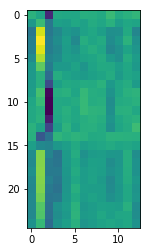

In [796]:
plt.imshow(train_spoken[0].reshape(fragment_length,13))

In [771]:
print(train_spoken.shape)
print(train_written.shape)

(45000, 325)
(45000, 784)


In [772]:
train_y = df_train_y.reshape(45000,1)

## Concatenate to oversample and shuffle

In [773]:
data_train = np.concatenate((train_y , train_written , train_spoken),axis=1)
data_assignment = np.concatenate((assignment_written , assignment_spoken),axis=1)

In [774]:
indices_negative = np.where(data_train[:,0]==False)[0]
indices_positive = np.where(data_train[:,0]==True)[0]

In [775]:
indices_positive = np.random.choice(indices_positive,size=len(indices_negative),replace=True)
balanced_data = np.concatenate((data_train[indices_negative],data_train[indices_positive]),axis=0)
balanced_data.shape

(81292, 1110)

In [776]:
from sklearn.utils import shuffle
data_train = shuffle(balanced_data)

In [777]:
from sklearn.model_selection import train_test_split

X_train, X_test = \
            train_test_split(data_train, test_size=0.2, random_state=4099)

In [778]:
y_train = X_train[:,0]
X_train_written = X_train[:,1:785]
X_train_spoken  = X_train[:,785:]

In [779]:
y_test = X_test[:,0]
X_test_written = X_test[:,1:785]
X_test_spoken  = X_test[:,785:]

In [780]:
X_assignment_written = data_assignment[:,:784]
X_assignment_spoken = data_assignment[:,784:]

In [781]:
# X_train_spoken = train_spoken
# X_train_written = train_written

## Transform back to correct format

In [782]:
X_train_written = np.array([x.reshape(28,28,1) for x in X_train_written])
X_assignment_written = np.array([x.reshape(28,28,1) for x in X_assignment_written])
X_test_written = np.array([x.reshape(28,28,1) for x in X_test_written])
print(X_train_written.shape)

(65033, 28, 28, 1)


In [783]:
X_train_spoken = np.array([x.reshape(fragment_length,13,1) for x in X_train_spoken])
X_test_spoken = np.array([x.reshape(fragment_length,13,1) for x in X_test_spoken])
X_assignment_spoken = np.array([x.reshape(fragment_length,13,1) for x in X_assignment_spoken])
print(X_train_spoken.shape)

(65033, 25, 13, 1)


## Normalize

In [784]:
X_train_written /= 255
X_test_written /= 255
X_assignment_written /= 255

X_train_spoken /= 8
X_test_spoken /= 8
X_assignment_spoken /= 8

## Train

In [785]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import RMSprop
from keras.models import Sequential, Model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras.optimizers import Adagrad

batch_size = 100
epochs = 2

print(X_train_written.shape[0], 'train samples')
print(X_test_written.shape[0], 'test samples')

x = keras.layers.concatenate([spoken_model.output, written_model.output])
output = Dense(1, kernel_initializer='zeros', activation='sigmoid', name='output')(x)

final_model = Model(inputs=[spoken_model.input,written_model.input], outputs=[output])

65033 train samples
16259 test samples


In [786]:
final_model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [787]:
X_spoken = np.concatenate((X_train_spoken,X_test_spoken),axis=0)
X_written = np.concatenate((X_train_written,X_test_written),axis=0)

In [788]:
print(y_train[:10])

[0. 1. 1. 0. 1. 0. 1. 1. 0. 0.]


In [724]:
final_model.fit([X_train_spoken,X_train_written], y_train, \
                epochs=10, batch_size=300, \
                validation_data=([X_test_spoken,X_test_written], y_test))

ValueError: Input arrays should have the same number of samples as target arrays. Found 16259 input samples and 2200 target samples.

In [108]:
X_spoken = np.concatenate((X_train_spoken,X_test_spoken),axis=0)
X_written = np.concatenate((X_train_written,X_test_written),axis=0)
Y = np.concatenate((y_train, y_test),axis=0)

In [109]:
final_model.fit([X_spoken,X_written], Y, \
                epochs=10, batch_size=300)

Epoch 1/10
81292/81292 [==============================] - 77s 947us/step - loss: 0.2400 - acc: 0.9082
Epoch 2/10
81292/81292 [==============================] - 78s 958us/step - loss: 0.2179 - acc: 0.9187
Epoch 3/10
81292/81292 [==============================] - 76s 937us/step - loss: 0.2027 - acc: 0.9241
Epoch 4/10
81292/81292 [==============================] - 77s 942us/step - loss: 0.1972 - acc: 0.9274
Epoch 5/10
81292/81292 [==============================] - 78s 960us/step - loss: 0.1862 - acc: 0.9307
Epoch 6/10
81292/81292 [==============================] - 76s 940us/step - loss: 0.1825 - acc: 0.9331
Epoch 7/10
81292/81292 [==============================] - 77s 949us/step - loss: 0.1742 - acc: 0.9358
Epoch 8/10
81292/81292 [==============================] - 77s 941us/step - loss: 0.1704 - acc: 0.9375
Epoch 9/10
81292/81292 [==============================] - 77s 953us/step - loss: 0.1653 - acc: 0.9397
Epoch 10/10
81292/81292 [==============================] - 77s 948us/step - loss: 

In [89]:
y_pred = final_model.predict([X_train_spoken,X_train_written],verbose=0)

In [91]:
score = final_model.evaluate([X_test_spoken, X_test_written], y_test,verbose=0)

In [93]:
final_model.save('model4.h5')

In [92]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19060262903874486
Test accuracy: 0.9455071037579187


# Calculate F1 Score

## For own test set:

In [94]:
from sklearn.metrics import f1_score

In [95]:
y_pred = final_model.predict([X_test_spoken,X_test_written],verbose=0)

In [96]:
y_pred = np.array([int(y[0]>0.5)for y in y_pred])

In [99]:
f1_score(y_test.astype(int),y_pred)

0.9477409460894184

# For given testset

In [130]:
y_pred = final_model.predict([X_assignment_spoken,X_assignment_written],verbose=0)
y_pred = np.array([y[0]<0.5 for y in y_pred])

In [131]:
result = y_pred

In [128]:
result.shape

(15000,)

In [132]:
np.save('result.npy', result)

# Check results of written on emperically checked trainset

In [355]:
y_written_pred =  written_model.predict(X_train_written).argmax(axis=1)

In [373]:
y_written_pred[:10] # ALL CORRECT

array([0, 1, 1, 9, 0, 2, 1, 8, 7, 7])

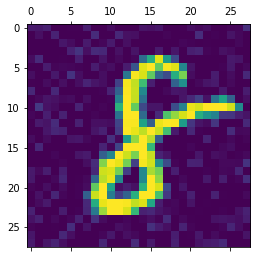

In [394]:
plt.matshow(X_train_written[7].reshape(28,28))

## Check results of spoken trainset

In [606]:
def my_transformer(mat):
    new_mat = np.zeros(mat.shape) 
    new_mat[:,1] = -mat[:,0]
    new_mat[:,2] = -mat[:,1]
    new_mat[:,9] = -mat[:,2]
    new_mat[:,3] = -mat[:,3]
    new_mat[:,12] = -mat[:,4]
    new_mat[:,0] = -mat[:,5]
    new_mat[:,10] = -mat[:,6]
    new_mat[:,6] = -mat[:,7]
    new_mat[:,11] = -mat[:,8]  
    new_mat[:,4] = -mat[:,9]
    new_mat[:,8] = -mat[:,10]  
    new_mat[:,7] = -mat[:,11] 
    new_mat[:,5] = -mat[:,12]
    return new_mat

In [713]:
y_spoken_pred = spoken_model.predict(X_train_spoken).argmax(axis=1)

In [763]:
f1_score(y_written_pred == y_spoken_pred ,train_y.flatten() )

0.9967875172097292

In [735]:
((y_written_pred == y_spoken_pred) == train_y.flatten()).sum()/45000

0.9993777777777778

# Predict for real

In [759]:
pred_spoken  = spoken_model.predict(X_assignment_spoken).argmax(axis=1) 
pred_written = written_model.predict(X_assignment_written).argmax(axis=1) 

In [762]:
(pred_spoken == pred_written)

array([False, False, False, ..., False, False, False])